In [37]:
#save the dataset
import requests
url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/IRIS.csv"
response = requests.get(url)
local_file_path = "iris_dataset.csv"
with open(local_file_path, 'wb') as f:
    f.write(response.content)    

In [38]:
import pandas as pd
df=pd.read_csv('iris_dataset.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Data Exploration and Preprocessing

In [39]:
#number of rows and columns in the dataset
df.shape

(150, 5)

In [40]:
#overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [41]:
#statistical description of the dataset
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [42]:
#lets find out the count of each species
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [43]:
#check for missing values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Data Visualization 

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

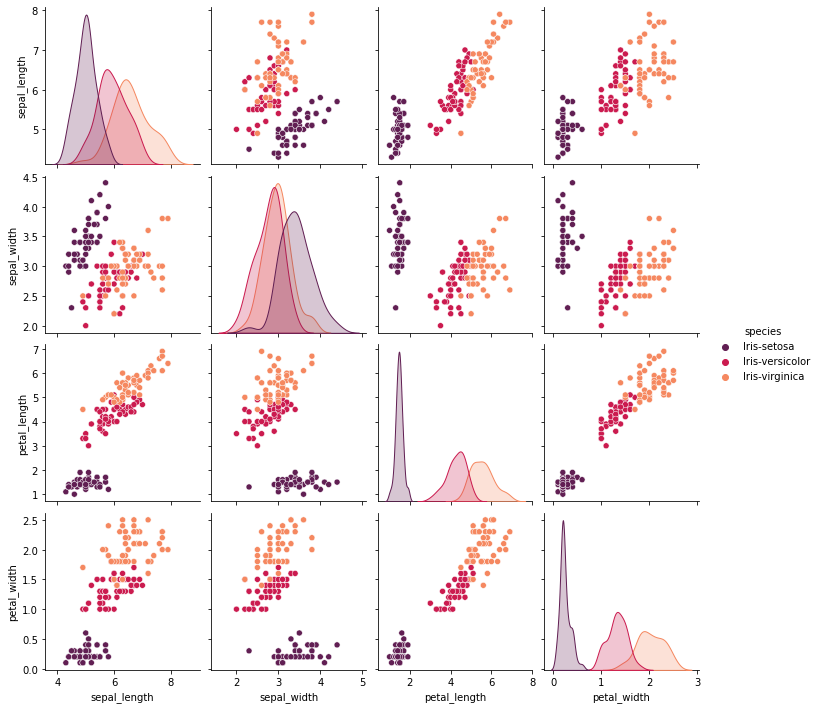

In [45]:
#lets plot the pairwise relationship between the features using pairplot
sns.pairplot(df, hue='species', palette='rocket')
plt.show()

From the above pairplot we can conclude that Iris-setosa has the longest sepal length,petal length and petal width.
Also Iris-setosa is differentiable from the other two species which have common points between them

<AxesSubplot:>

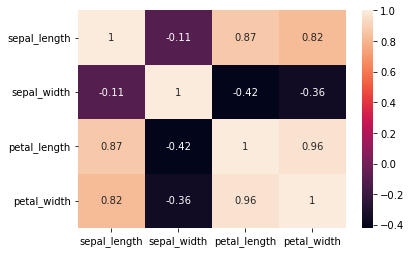

In [46]:
#lets find the correlation using heatmap
sns.heatmap(df.corr(), annot=True, cmap='rocket')

From the above heatmap we can conclude that features having positive coefficients indicates that the two features are directly related whereas the negative coefficient indicate they are inversely related

Here 0 is Iris-setosa, 1 is Iris-versicolor, 2 is Iris-verginica

### Model selection and Training 

In [47]:
#feature and target set
x=df.drop(['species'],axis=1)
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [48]:
y=df['species']
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [49]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [50]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()

In [51]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [52]:
dt_pred=tree.predict(x_test)

In [53]:
dt_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

In [55]:
#Evaluation
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test,dt_pred)

0.9333333333333333

In [58]:
print('\nClassification report\n',classification_report(y_test,dt_pred))


Classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [62]:
values=[[5.0,3.6,1.4,0.2]]
tree.predict(values)

array(['Iris-setosa'], dtype=object)